# Homework 02


## Part 1 - Questions

### Question 1: 

How long do Citi Bike riders ride in August, 2021 in Jersey City (mean, max, min, and the general distribution)?

* Who (population): Jersey City Citi Bike riders.
* What (subject, discipline): Distribution of bike trips length, mean, median, max, min length of bike trips.
* Where (location): Jersey City.
* When (snapshot, longitudinal): August, 2021.
* How much data do you need to do the analysis/work: The data should be in a reasonable size; if there is not too much data, my conclusion could be weak.

### Question 2: 

Where is the most popular start stations and end stations in Jersey City in August, 2021? Are they the same?

* Who (population): Jersey City Citi Bike Rider
* What (subject, discipline): Most popular start/end station
* Where (location): Jersey City
* When (snapshot, longitudinal): August, 2021
* How much data do you need to do the analysis/work: The data should be in a reasonable size; if there is not too much data, my conclusion could be weak.

### Who Might Collect Relevant Data / What Articles or Publications Cite a Relevant Data Set?

I found Citi Bike reports its histories data at https://ride.citibikenyc.com/system-data every month.

## Part 2 - Selecting a Data Set, Adding Documentation



1. Name / Title: JC-202108-citibike-tripdata
2. Link to Data: https://s3.amazonaws.com/tripdata/JC-202108-citibike-tripdata.csv.zip
3. Source / Origin: 
	* Author or Creator: Bikeshare
	* Publication Date: Sep 9th, 2021
	* Publisher: Bikeshare
	* Version or Data Accessed: 1.0 (the version is not listed, so I assume it as Ver 1.0)
4. License: Citi Bike Data License Agreement https://ride.citibikenyc.com/data-sharing-policy
5. Can You Use this Data Set for Your Intended Use Case? Yes.

## Format




### Overview

* Format: CSV
* Size: 18.1 MB
* Number of Records: 93800 rows
 



### Sample of Data




In [95]:
# TODO show a few lines of data from the actual file

# Use "regular" Python to do this in this code block
# Assume that jupyter-lab was started in your root directory
# with open('./data/raw/example-data.csv', 'r'): 
import csv
with open('../data/raw/JC-202108-citibike-tripdata.csv') as f: 
    reader = csv.reader(f)
    row1 = next(reader)
    row2 = next(reader)
    row3 = next(reader)
    print(row1)
    print(row2)
    print(row3)

['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual']
['5CABAE380FF3C7E0', 'classic_bike', '2021-08-06 07:02:02', '2021-08-06 07:28:56', 'Dey St', 'JC065', 'Stevens - River Ter & 6 St', 'HB602', '40.737711', '-74.066921', '40.74313282710551', '-74.02698867022991', 'casual']
['0C820F4E9256B5BB', 'classic_bike', '2021-08-15 19:48:51', '2021-08-15 20:04:45', 'Grand St & 2 St', 'HB405', 'Jersey & 3rd', 'JC074', '40.73913', '-74.03618', '40.72333158646436', '-74.04595255851744', 'member']



### Fields or Column Headers

* Field/Column 1: ride_id, string.
* Field/Column 2: rideable_type, string.
* Field/Column 3: **started_at**, the original data type is string, but I will convert it to datetime and then numeric.
* Field/Column 4: **ended_at**, the original data type is string, but I will convert it to datetime and then numeric.
* Field/Column 5: **start_station_name**, string.
* Field/Column 6: start_station_id, string.
* Field/Column 7: **end_station_name**, string.
* Field/Column 8: end_station_id, string.
* Field/Column 9: start_lat, string.
* Field/Column 10: start_lng, string.
* Field/Column 11: end_lat, string.
* Field/Column 12: end_lng, string.
* Field/Column 13: member_casual, string.

## Part 3 - Extract / Transform

* I will use four columns: start_station_name, end_station_name, started_at, and ended_at.
* Since I need bike riding duration, I will need to make calculations on started_at and ended_at. These two columns are string types originally. To make the calculation easier, I will convert them to datetime objects, and then calculate the interval between start and end, which would be the duration.
* I will remove the data with duration smaller than zero. These data are errorous, since people cannot make the starting time later than the ending time.

In [96]:
# TODO write code here!
import csv
from datetime import datetime
pop_start_station = {}
pop_end_station = {}
duration_lst = []
with open('../data/raw/JC-202108-citibike-tripdata.csv') as f:
    reader = csv.reader(f)
    next(reader, None)
    for row in reader:
        if row[4] in pop_start_station:
            pop_start_station[row[4]] += 1
        elif row[4] not in pop_start_station:
            pop_start_station[row[4]] = 0
        if row[6] in pop_end_station:
            pop_end_station[row[6]] += 1
        elif row[6] not in pop_end_station:
            pop_end_station[row[6]] = 0
        start_time = datetime.strptime(row[2], "%Y-%m-%d %H:%M:%S")
        end_time = datetime.strptime(row[3], "%Y-%m-%d %H:%M:%S")
        duration = end_time - start_time
        if duration.total_seconds() >= 0:
            duration_lst.append(duration.total_seconds())

## Part 4 - Descriptive Statistics

### Analysis on Numeric Data

#### Central Tendency

In [97]:
# TODO: copy and paste your results here
import numpy as np
duration_lst = np.array(duration_lst)
mean = np.mean(duration_lst)
median = np.median(duration_lst)
print(mean)
print(median)

1116.0747296807353
525.0


#### Dispersion

In [98]:
# TODO: copy and paste your results here
std = np.std(duration_lst)
print(std)

4319.18225673212


#### Outliers

In [99]:
# TODO: copy and paste your results here
max_duration = duration_lst.max()
min_duration = duration_lst.min()
print(max_duration)
print(min_duration)

distance_from_mean = abs(duration_lst - mean)
not_outlier = distance_from_mean < 1.5 * std
duration_lst = duration_lst[not_outlier]
print(duration_lst.max())
print(duration_lst.min())

422921.0
0.0
7592.0
0.0


#### Other


In [100]:
# TODO: copy and paste your results here
Q1 = np.percentile(duration_lst, 25)
Q3 = np.percentile(duration_lst, 70)
print(Q1)
print(Q3)

310.0
807.0


###  Analysis on Categorical Data

#### Frequency

In [110]:
# TODO: copy and paste your results here
pop_start_station_ranked = {key: value for key, value in sorted(pop_start_station.items(), key=lambda item: item[1])}
pop_end_station_ranked = {key: value for key, value in sorted(pop_end_station.items(), key=lambda item: item[1])}
print("Frequencies of start stations: \n", pop_start_station_ranked, "\n")
print("Frequencies of end stations: \n", pop_end_station_ranked)

most_pop_start_station = max(pop_start_station, key=pop_start_station.get)
most_pop_end_station = max(pop_end_station, key=pop_end_station.get)
print("\n")
print("The most popular start station is " + most_pop_start_station + " with frequency " + str(pop_start_station[most_pop_start_station]) + "s.\n")
print("The most popular end station is " + most_pop_end_station + " with frequency " + str(pop_end_station[most_pop_end_station]) + "s.")

Frequencies of start stations: 
 {'JCBS Depot': 1, 'Grant Ave & MLK Dr': 88, 'Bergen Ave & Stegman St': 167, 'Jackson Square': 211, 'Union St': 215, '5 Corners Library': 234, 'Dey St': 254, 'Stevens - River Ter & 6 St': 286, 'Communipaw & Berry Lane': 331, 'Leonard Gordon Park': 341, 'Glenwood Ave': 410, 'Christ Hospital': 423, 'Brunswick & 6th': 481, 'Heights Elevator': 506, 'Astor Place': 522, 'Riverview Park': 528, 'Madison St & 10 St': 586, 'Oakland Ave': 594, 'Dixon Mills': 613, 'Montgomery St': 617, 'Journal Square': 642, 'Lincoln Park': 652, 'Jersey & 6th St': 661, 'Mama Johnson Field - 4 St & Jackson St': 670, 'Bergen Ave': 680, 'Hilltop': 708, 'Adams St & 11 St': 717, 'Essex Light Rail': 724, 'Pershing Field': 728, 'Lafayette Park': 753, 'Willow Ave & 12 St': 768, 'Clinton St & 7 St': 815, '6 St & Grand St': 816, 'Monmouth and 6th': 849, 'Jersey & 3rd': 869, '9 St HBLR - Jackson St & 8 St': 898, 'Baldwin at Montgomery': 921, 'Morris Canal': 1004, '4 St & Grand St': 1021, '12 S

#### Unique Values

In [111]:
# TODO: copy and paste your results here
pop_start_station_lst = []
pop_end_station_lst = []
for key in pop_start_station.keys():
    pop_start_station_lst.append(key)
for key in pop_end_station.keys():
    pop_end_station_lst.append(key)
print("Unique Values of Start Stations: \n", pop_start_station_lst, "\n")
print("Unique Values of End Stations: \n", pop_end_station_lst)

Unique Values of Start Stations: 
 ['Dey St', 'Grand St & 2 St', 'Glenwood Ave', 'Newport PATH', 'Columbus Dr at Exchange Pl', 'Pershing Field', 'South Waterfront Walkway - Sinatra Dr & 1 St', 'McGinley Square', '6 St & Grand St', 'Jersey & 3rd', '7 St & Monroe St', 'Morris Canal', 'Heights Elevator', 'Grove St PATH', 'Clinton St & 7 St', 'Willow Ave & 12 St', 'Lafayette Park', 'JC Medical Center', 'Astor Place', 'Liberty Light Rail', '14 St Ferry - 14 St & Shipyard Ln', 'Grand St', 'Essex Light Rail', 'Hamilton Park', 'Columbus Drive', 'Journal Square', 'Bergen Ave', 'Madison St & 10 St', 'Warren St', 'Hilltop', 'Harborside', 'Jersey & 6th St', 'Paulus Hook', 'Jackson Square', 'Montgomery St', 'Brunswick St', 'Riverview Park', 'Church Sq Park - 5 St & Park Ave', 'Monmouth and 6th', '11 St & Washington St', 'Washington St', 'Southwest Park - Jackson St & Observer Hwy', '9 St HBLR - Jackson St & 8 St', 'Mama Johnson Field - 4 St & Jackson St', '12 St & Sinatra Dr N', 'Madison St & 1 St'

## Part 5 - Visualizations



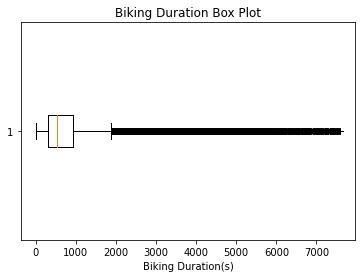

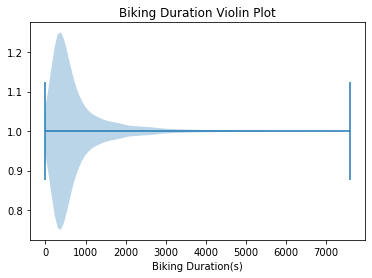

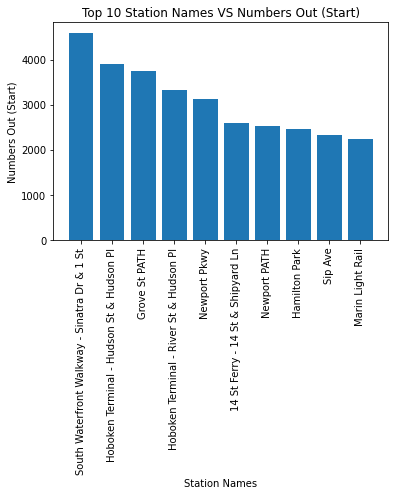

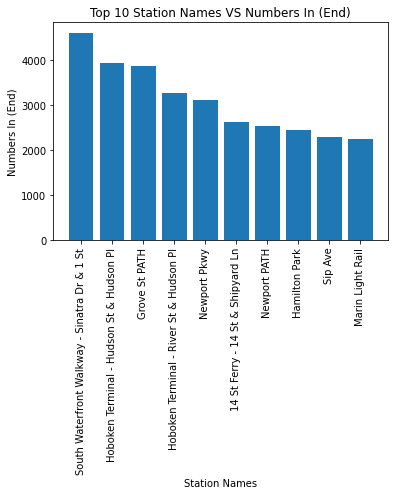

In [114]:
# TODO: add visualizations here
import matplotlib.pyplot as plt
plt.boxplot(duration_lst, sym = '+', vert = False)
plt.title("Biking Duration Box Plot")
plt.xlabel("Biking Duration(s)")
plt.show()

plt.violinplot(duration_lst, vert = False)
plt.title("Biking Duration Violin Plot")
plt.xlabel("Biking Duration(s)")
plt.show()

pop_start_station_lst_item = list(pop_start_station.items())
pop_start_station_lst_item = sorted(pop_start_station_lst_item, key=lambda entry: entry[1], reverse = True)[:10]
plt.bar([k[0] for k in pop_start_station_lst_item[:]], [k[1] for k in pop_start_station_lst_item[:]])
plt.xticks(rotation='vertical')
plt.title("Top 10 Station Names VS Numbers Out (Start)")
plt.xlabel("Station Names")
plt.ylabel("Numbers Out (Start)")
plt.show()

pop_end_station_lst_item = list(pop_end_station.items())
pop_end_station_lst_item = sorted(pop_end_station_lst_item, key=lambda entry: entry[1], reverse = True)[:10]
plt.bar([j[0] for j in pop_end_station_lst_item[:]], [j[1] for j in pop_end_station_lst_item[:]])
plt.xticks(rotation='vertical')
plt.title("Top 10 Station Names VS Numbers In (End)")
plt.xlabel("Station Names")
plt.ylabel("Numbers In (End)")
plt.show()

* The first box plot reflects the distribution of biking duration of Citi Bike riders. The orange line represents the mean, and the two black lines represent the -1.5 and + 1.5 times interquatile range. The values outside these black lines are considered outliers.
* The second violin plot is pretty similar to the box plot, but it shows the probability density of the data at different values, which is more explicit to understand how data distribute.
* The following two bar plots reflect the top 10 most popular start stations and end stations in Jersey city.

## Part 6 - Conclusion

* The box plot did not help me too much understanding the distribution, since there are a lot of "outliers" on the right side of the plot, which are messy. But it reflects the median riding duration, which is 525.0s, also the first quatile and third quatile.
* The violin plot help me understand the distribution much better, we can tell the majority of riding durations is within 1000s, which is 16 minutes. But comparing to the box plot, median, first quatile, third quatile are not clearly shown on the violin plot.
* The last two barplots answer my second question: the top 10 most popular start stations and end stations are the same, as shown above.
* There are still some places can be improved: the dataset contains unexplainable data such as 0s riding time. This is impossible in the real life, but as I tried to remove the values which are more than 1.5 standard deviations away from the mean, these 0s values have still not been gotten rid of. It will be too arbitrary if I directly remove it. Probably this dataset itself is not really "beginner-friendly:" the standard deviation is even more than 4000, which indicates the data is tough to make analysis on.